# Figure styling

`Sbijax` comes with custom styles that can be used to customize figures produced with the plotting functionality of the package. This notebook demonstrates how they can be used.

Interactive online version of this notebook:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dirmeier/sbijax/blob/main/docs/notebooks/figure_styling.ipynb)

In [1]:
import jax
import numpy as np
import sbijax
%matplotlib inline
import matplotlib.pyplot as plt

We demonstrate the different styles using a neural likelihood estimator on a simple mixture model.

In [2]:
from jax import numpy as jnp, random as jr
from sbijax import NLE
from sbijax.nn import make_mdn
from tensorflow_probability.substrates.jax import distributions as tfd

In [3]:
def prior_fn():
    prior = tfd.JointDistributionNamed(dict(
        theta=tfd.Normal(jnp.zeros(2), 1)
    ), batch_ndims=0)
    return prior

def simulator_fn(seed, theta):
    mean = theta["theta"].reshape(-1, 2)
    n = mean.shape[0]
    data_key, cat_key = jr.split(seed)
    categories = tfd.Categorical(logits=jnp.zeros(2)).sample(seed=cat_key, sample_shape=(n,))
    scales = jnp.array([1.0, 0.1])[categories].reshape(-1, 1)
    y = tfd.Normal(mean, scales).sample(seed=data_key)
    return y

In [4]:
fns = prior_fn, simulator_fn
neural_network = make_mdn(2, 5)
model = NLE(fns, neural_network)

In [5]:
y_observed = jnp.array([-2.0, 1.0])

data, _ = model.simulate_data(jr.PRNGKey(1))
params, info = model.fit(jr.PRNGKey(2), data=data)
inference_result, _ = model.sample_posterior(jr.PRNGKey(3), params, y_observed)

  6%|██████████████████▋                                                                                                                                                                                                                                                                                                                | 58/1000 [00:04<01:14, 12.71it/s]


We use functions visualizing posterior draws and MCMC model diagnostics to demonstrate the styles.

In [6]:
from sbijax import plot_posterior, plot_trace, plot_rank, plot_rhat_and_ress

As a defaut, `sbijax` uses a redish color scheme with serif fonts for the text used in the figures.

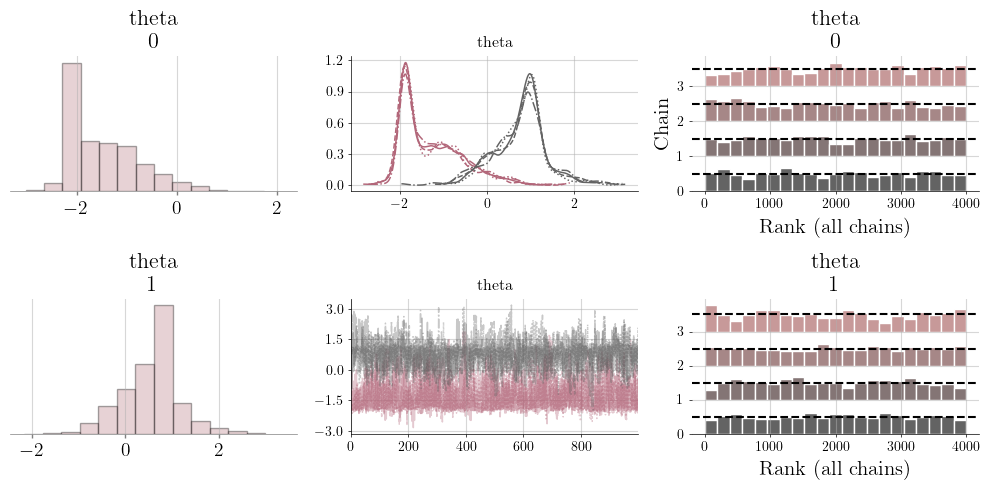

In [7]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
plot_posterior(inference_result, np.array([axes[0, 0], axes[1, 0]]))
plot_trace(inference_result, np.array([axes[0, 1], axes[1, 1]]))
plot_rank(inference_result, np.array([axes[0, 2], axes[1, 2]]))
plt.tight_layout()
plt.show()

We provide two different color schemes, called `sbijax-bluish` and `sbijax-grayish`. You can use it by providing one of them to `matplotlib`'s `pyplot.style.context` function:

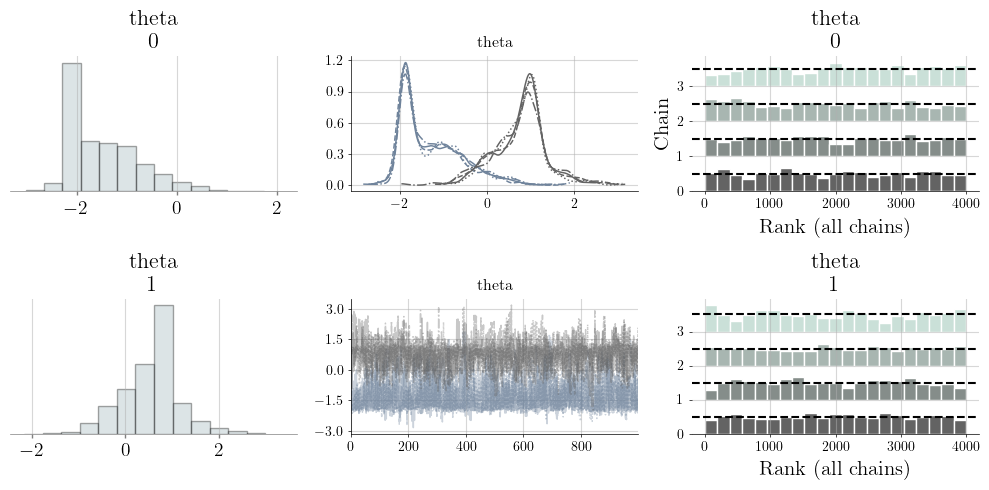

In [8]:
with plt.style.context("sbijax-bluish"):
    _, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
    plot_posterior(inference_result, np.array([axes[0, 0], axes[1, 0]]))
    plot_trace(inference_result, np.array([axes[0, 1], axes[1, 1]]))
    plot_rank(inference_result, np.array([axes[0, 2], axes[1, 2]]))
    plt.tight_layout()
    plt.show()

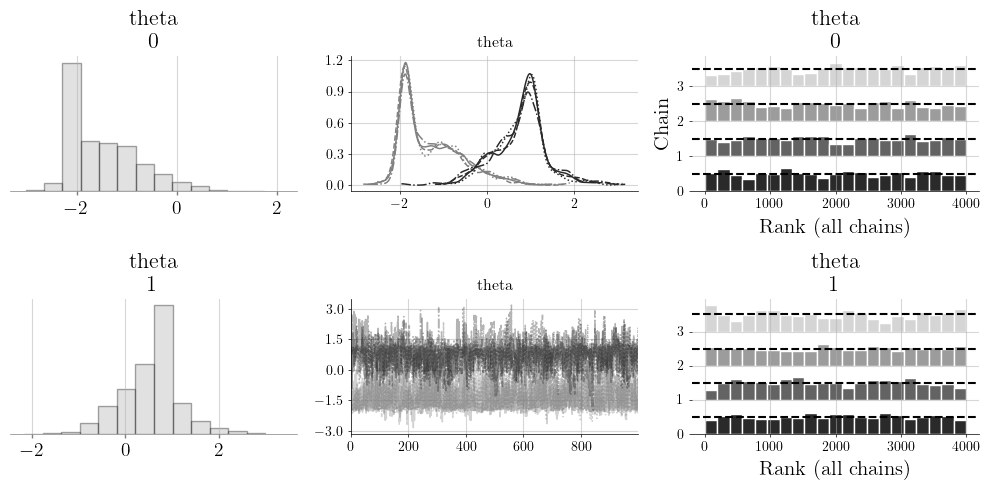

In [9]:
with plt.style.context("sbijax-grayish"):
    _, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
    plot_posterior(inference_result, np.array([axes[0, 0], axes[1, 0]]))
    plot_trace(inference_result, np.array([axes[0, 1], axes[1, 1]]))
    plot_rank(inference_result, np.array([axes[0, 2], axes[1, 2]]))
    plt.tight_layout()
    plt.show()

It is also possible to mix the styles:

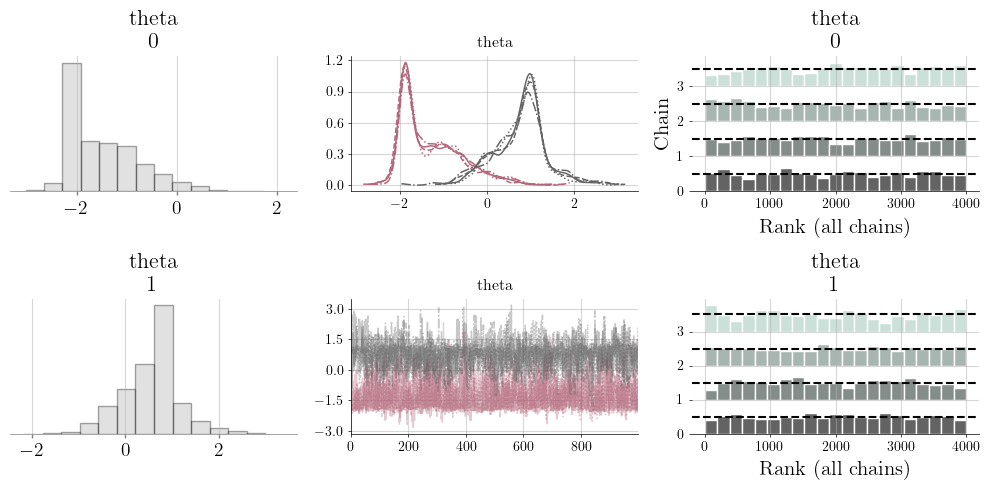

In [10]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
with plt.style.context("sbijax-grayish"):
    plot_posterior(inference_result, np.array([axes[0, 0], axes[1, 0]]))
plot_trace(inference_result, np.array([axes[0, 1], axes[1, 1]]))
with plt.style.context("sbijax-bluish"):
    plot_rank(inference_result, np.array([axes[0, 2], axes[1, 2]]))
plt.tight_layout()
plt.show()

Since `sbijax` builds on `Arviz`, you can also use the color schemes provided by `Arviz`:

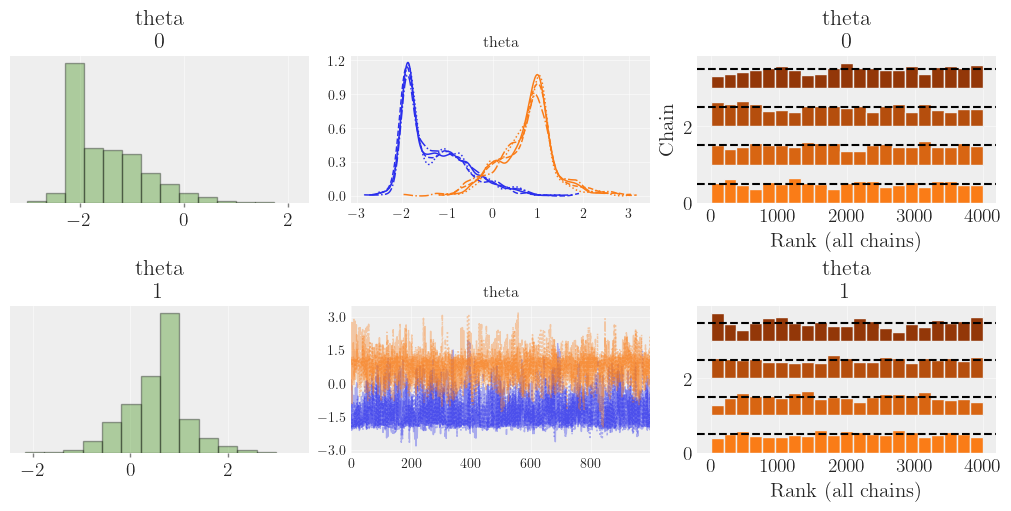

In [11]:
with plt.style.context(["arviz-darkgrid", "arviz-colors"]):
    _, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
    plot_posterior(inference_result, np.array([axes[0, 0], axes[1, 0]]))
    plot_trace(inference_result, np.array([axes[0, 1], axes[1, 1]]))
    plot_rank(inference_result, np.array([axes[0, 2], axes[1, 2]]))
    plt.tight_layout()
    plt.show()

## Session info

In [12]:
import session_info

session_info.show(html=False)

-----
arviz                       0.17.1
haiku                       0.0.11
jax                         0.4.24
jaxlib                      0.4.24
matplotlib                  3.6.2
numpy                       1.24.1
sbijax                      1.0.0
session_info                1.0.0
tensorflow_probability      0.24.0-dev20240224
-----
IPython             8.8.0
jupyter_client      7.4.9
jupyter_core        5.1.3
jupyterlab          3.5.2
notebook            6.5.2
-----
Python 3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:48:25) [Clang 14.0.6 ]
macOS-13.0.1-arm64-arm-64bit
-----
Session information updated at 2024-07-19 17:45
